# Linear Regression GP 2

***

## Related Lessons

 - [Multiple Linear Regression](https://github.com/learn-co-curriculum/dsc-multiple-linear-regression) 

 - [Dealing with Categorical Variables Lab](https://github.com/learn-co-curriculum/dsc-dealing-with-categorical-variables-lab/tree/solution)

 - [Multicollinearity of Features Lab](https://github.com/learn-co-curriculum/dsc-multicollinearity-of-features-lab/tree/solution)

 - [OLS Statsmodels Lab](https://github.com/learn-co-curriculum/dsc-ols-statsmodels-lab/tree/solution)

 - [Complete Regression Lab](https://github.com/learn-co-curriculum/dsc-complete-regression-lab/tree/solution)
 
 - [Log Transformations](https://github.com/learn-co-curriculum/dsc-log-transformation)
 
 - [Feature Scaling and Normalization Lab](https://github.com/learn-co-curriculum/dsc-feature-scaling-and-normalization-lab)
 
    - Topics 

  - How to interpret the results from a simple linear regression model and discuss their real-world implications.
- What multiple linear regression is and why it is useful for solving real-world problems.
- How to run a multiple linear regression model in Python using statsmodels.

## Guided Practice 2 Goals

Performing simple linear regression and understanding evaluation metrics.

- How to interpret the results from a simple linear regression model and discuss their real-world implications
- What multiple linear regression is and why it is useful for solving real-world problems
- How to run a multiple linear regression model in Python using statsmodels and scikit-learn

### First Goal

- To understand how well our model is able to **predict** future conditions, trends, or **values**.

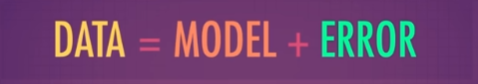

Question 1: Does our regression line fit the data well?

We make predictions on train and test data and measure the error to understand how well our model will generalize when making new predictions.

###### Scope

* We analyze the performance between the train and test predictions using various metrics:
    - MAE
    - MSE
    - RMSE
    - $R^2$
    - Adjusted $R^2$

### Second Goal

* To determine and **measure** the **relationships** between the dependent and independent variables.

Question 2: Are the coefficients statistically significant?

### Third Goal

* To **understand** how one variable **changes** when another changes

Question 3: What is the economic impact of the estimated coefficients?

##### Scope

* The coefficients and p-values are able to inform us of the influence that an independent variable has on the dependent variable.

    - Coefficients
    - $p-value$

In [1]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# https://www.kaggle.com/datasets/mirichoi0218/insurance
insurance_df = pd.read_csv('insurance.csv')

### Data Description

| Column     | Description                                                                                                                                                                                                                |
|------------|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `age`      | **Age of policy holder**                                                                                                                                                                                             |
| `sex`      | **Policy Holder's gender*, female male**                                                                                                                                                                              |
| `bmi`      | **Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9** |
| `children` | **Number of children covered by health insurance/ Number of dependents**                                                                                                                                                   |
| `smoker`   | **True if currently smokes, False if does not smoke**                                                                                                                                                                      |
| `region`   | **The beneficiary's residential area in the US, northeast, southeast, southwest, northwest**                                                                                                                               |
| `charges`  | **Individual medical costs billed by health insurance in dollars**                                                                                                                                                                    |

In [3]:
## Comments & Questions

In [10]:
# create colormap
cm = sns.light_palette("purple", as_cmap=True)

# view DataFrame
insurance_df.style.background_gradient(cmap=cm)

In [19]:
# check info on columns/data size
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
# check descriptive statistics
insurance_df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [26]:
# Label Encode object variables
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(insurance_df['sex'].drop_duplicates()) 
insurance_df['sex'] = le.transform(insurance_df['sex'])
# smoker or not
le.fit(insurance_df['smoker'].drop_duplicates()) 
insurance_df['smoker'] = le.transform(insurance_df['smoker'])
#region
le.fit(insurance_df['region'].drop_duplicates()) 
insurance_df['region'] = le.transform(insurance_df['region'])

### StatsModels vs. Sci-Kit Learn

Statsmodels is useful for more statistical analysis oriented linear regression.

SKLearn is useful for more machine learning optimaization oriented linear regression.

## StatsModels Multiple Linear Regression

In [27]:
# import statsmodels library
import statsmodels.api as sm

# create predictors
predictors = insurance_df.drop(['charges'], axis=1)

# create model intercept
predictors_int = sm.add_constant(predictors)

# fit model to data
model = sm.OLS(insurance_df['charges'],predictors_int).fit()

/Users/mojo_flat/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Simple Linear Regression

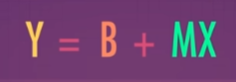

Multivariate Linear Regression Equation

$$ \hat y = \hat\beta_0 + \hat\beta_1 x_1 + \hat\beta_2 x_2 +\ldots + \hat\beta_n x_n$$

### Coefficients

In [28]:
# view model coefficients
model.params

const      -11815.452321
age           257.288075
sex          -131.110580
bmi           332.570132
children      479.369394
smoker      23820.434123
region       -353.640017
dtype: float64

With the coefficients we can explore questions 2 & 3:
    
    - To determine and measure the relationships between the dependent and independent variables
    
    - To understand how one variable changes when another changes

***Coefficients***: The coefficients of the features also describe the mathematical relationship between each independent variable and the dependent variable, which in this case is the medical costs billed by health insurance. 

The coefficient value helps us understand the marginal effect of the features on the dependent variable. **Given a one-unit change in the feature variable when the other features are unchanged, how much is the dependent variable changed**.

***
What is the economic impact of the estimated coefficient of `age`?

They also **inform us if there is a positive or negative correlation between the features and target**. For our notebook, we will assess the coefficients of our features to ensure we have features that are relevant to the charge for insurance. 

For this we can call the `.summary()` method which will display several results from our model:

### Model Summary

In [29]:
# view results of model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.1
Date:                Sat, 11 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:59:48   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.182e+04    955.130    -12.371      0.000   -1.37e+04   -9941.729
age          257.2881     11.886     21.647      0.000     233.971     280.605
sex         -131.1106    332.811     -0.394      0.694    -784.001     521.780
bmi          332.5701     27.722     11.997      0.000     278.186     386.954
children     479.3694    137.644      3.483      0.001     209.346     749.393
smoker      2.382e+04    411.843     57.839      0.000     2.3e+04    2.46e+04
region      -353.6400    151.927     -2.328      0.020    -651.682     -55.598
==============================================================================
Omnibus:                      299.003   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              713.975
Skew:                           1.207   Prob(JB):                    9.17e-156
Kurtosis:                       5.642   Cond. No.                         296.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
#dir(model)

### No. Observations

The number of observations within the data.

In [ ]:
# view dimensions of the DataFrame
insurance_df.shape

### DF residuals

Degrees of Freedom is the number of values in the final calculation of a statistic that are free to vary

* Degrees of Freedom, calculated by n-k-1 where:

    - $n$ = number of observations = 1338
    - $k$ = number of predicting variables = 6
    
1338-6-1 = 1331

### DF Model

How many independent variables we have in our model: 6

### Covariance Type

Covariance : Nonrobust

Recall that covariance is a measure of how two variables are linked in a positive or negative manner, and a robust covariance is one that is calculated in a way to minimize or eliminate variables, which is not the case here. 

Robust covariance methods are based on the fact that outliers lead to an increase of the values and making the spread of the data apparently larger.

### R-squared 

The **percentage of variation explained by the relationship between the dependent variable and the independent variables**. Lies within values between 0 and 1.

$$SS_{residual} = \sum (y - \hat{y})^2 $$

is the squared difference between $y$ and $\hat y$ (predicted y)

$$SS_{total} = \sum (y - \bar{y})^2 $$

is the squared difference between $y$ and $\overline y$ (mean of y)

So that

$$R^2 = 1- \dfrac{SS_{residual}}{SS_{total}}$$


In [33]:
# percentage of variance in the y variable explained by the x variable
model.rsquared

0.7507372027994937

This means there is **75.1% less variation around the regression line than the mean**, or the relationship between the dependent variable and the independent variables explains 75.1% of the variation in the data.

We can also say that 24.9% of the variation of the `charges` variable within the data is not explained by our model.

### Adjusted R-squared

***Adjusted $R^2$***: The Adjusted $R^2$ is **a key metric for evaluation of a multivariate linear regression model**, as **it accounts for the number of predictors in a model** when calculating the model's goodness-of-fit. It is a more accurate measure for assessing if our model explains changes in the dependent variable. 

$$R^2_{adj}= 1-(1-R^2)\dfrac{n-1}{n-p-1}$$

In [34]:
# display adjusted r-squared
model.rsquared_adj

0.7496135538263885

An Adjusted R-squared value of 0.750 can be described conceptually as: 

> ***75.0% of the variations in dependent variable $y$ are explained by the independent variables $x$ in our model.***

High Adjusted R-squared doesn’t mean that your model is good. We need to check the residual plot when fitting a regression model.

The good fit indicates that normality is a reasonable approximation.

### F-statistic

R-squared measures the strength of the relationship between our model and the dependent variable. 

However, it is not a formal test for the relationship. The F-test of overall significance is the hypothesis test for this relationship. 

The F-test of overall significance informs us **whether our linear regression model provides a better fit to the data than a model that contains no independent variables, or the intercept-only model.** 

For the intercept-only model, all of the model’s predictions equal the mean of the dependent variable. 

If the overall F-test is statistically significant, our model’s predictions are an improvement over using the mean.

In [35]:
# f-statistic to compare p-value
model.fvalue

668.1243170852778

The F-test for overall significance has two hypotheses:

**_Null Hypothesis_** $H_{0}$ : The intercept-only model fits the data as well as our model.

**_Alternative Hypothesis_** $H_{1}$ : The model fits the data better than the intercept-only model.

The null hypothesis should contain an equality (=, ≤ ,≥):
  - Average NBA Player's Height = 2.0m (6ft7in)
  - 𝐻0 : 𝜇 = 2.0

The alternate hypothesis should not have an equality (≠,<,>):

 - Average NBA Player's Height ≠ 2.0m (6ft7in)
 - 𝐻1 : 𝜇 ≠ 2.0 

### Prob (F-statistic)

The Prob (F-statistic) or p-value for the f-statistic informs us of the **likelihood that we would observe the values of our data** or values at least as extreme as the results actually observed **by random chance if there were no relationship between the features of our model and the** dependent variable, in this case the **medical costs billed by health insurance**.

In [36]:
# p-value for the liklihood our model 
# fits the data better than the mean
model.f_pvalue

0.0

Here we have a p-value of 0, and a quite large f-statistic value, which suggests to us that **we can reject the null hypothesis**, and assume the model fits the data better than the intercept-only model.

Compare the p-value for the F-test to our **significance level of 0.05**. If the p-value is less than the significance level, our sample data provides sufficient evidence to conclude that our regression model fits the data better than the model with no independent variables.

We can say that **there is a linear relationship between the features of our model and the medical costs billed by health insurance** with **95% confidence**.

It is also important to note that **we consider all of the features together for the f-statistic**.

### Std Error

The standard error can be thought of as a measure of the precision with which the regression coefficient is measured. The standard error of the coefficient is always positive.The smaller the standard error, the more precise the estimate.

Here we can see that the standard error of the `age` coefficient is smaller than that of `bmi`.Therefore, our model was able to estimate the coefficient for `age` with greater precision.

If we divide the coefficient by the std error, we calculate the t-value.

In [38]:
# return the standard error for 
# all coefficients in the equation
model.bse

const       955.129513
age          11.885743
sex         332.810704
bmi          27.722166
children    137.644218
smoker      411.842878
region      151.926590
dtype: float64

### T - test

To infer if a given feature is significant or relevant to the target variable, we **perform a t-test**. Here instead of **considering all of the features individually**, we perform a t-test on the dependent variable and the features one by one. 

**_Null Hypothesis_** $H_{0}$ : If the independent variables' t value is equal to 0, then the intercept-only model **fits the data as well** as our model.

**_Alternative Hypothesis_** $H_{1}$ : If the indendent variable's t value is not equal to 0, then the model **fits the data better** than the intercept-only model.

In [40]:
# display t-value for hours variable
model.tvalues[1]

21.64678057216227

The farther the t-value is away from 0, the greater the chances that we reject the null hypothesis and accept the alternate hypothesis for that feature. 

With a t-value of `21.65`, we can say that we are more likely to accept the alternate hypothesis that the model fits the data better than the intercept-only model.

Here we see that the feature with a t-value closest to 0 is `sex`. This feature may not have a statistically significant relationship to the medical costs billed by health insurance.

### P>|t|  or p-value 

p-values for the t-test

Again we can compare the p-values, or **likelihood that we would observe our data by random chance if our features had no statistically significant relationship to the `charges` variable**. When we compare the p-values of our features with a significance threshold of 0.05individually, if:

 - 𝑝 < $0.05$ : Reject that there is no relationship between the features of our model and the medical costs billed by health insurance.
 

 - 𝑝 >= $0.05$ : Accept the null hypothesis. There is no relationship between the features of our model and the medical costs billed by health insurance.

In [41]:
# check t-statistic probability score for constant
model.pvalues[0]

2.3753824947315803e-33

Here we could consider **all of our features sharing a statistically significant relationship with the medical costs billed by health insurance** with **95% confidence** except for `sex`.

***
Based on the p-value of the t-test, which feature has the least statistical influence on the dependent variable?

### Mean Absolute Error

Mean Absolute Error MAE: Represents average error

$$MAE = \frac{1}{n}\sum_{i=1}^{n}|y_{i} - \hat y_{i}|$$

In [42]:
# return residuals from model
residuals = model.resid

# view residuals
residuals

0       -8226.317864
1       -1962.052873
2       -2513.683707
3       18243.162205
4       -1670.785697
            ...     
1333    -1701.457702
1334    -1225.390847
1335    -2733.828866
1336      900.958387
1337    -7872.367796
Length: 1338, dtype: float64

In [43]:
# return predicted values from model
y_pred = model.fittedvalues

# view predicted values
y_pred

0       25111.241864
1        3687.605173
2        6963.145707
3        3741.308405
4        5537.640897
            ...     
1333    12302.006002
1334     3431.371647
1335     4363.662366
1336     1106.986613
1337    37013.728096
Length: 1338, dtype: float64

In [46]:
# true y value
y = insurance_df["charges"]

In [48]:
# return mean absolute error of model
mae_resid = np.mean(np.abs(y - y_pred))

# view residuals from model
mae_resid

4172.48711494405

The MAE informs us that **on average, our model has an error of** `4172.49` USD when **predicting the charge of insurance for a patient**.

### Mean Squared Error

The Mean Squared Error, or MSE tells us how close a regression line is to a set of true points. This is achieved by squaring the errors. It contrasts to MAE because it gives more weight to larger distances between the points to the regression line.

**MSE is more useful if we are concerned about large errors whose consequences are much larger than equivalent smaller ones**.

$$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat y_{i})^2$$

In [50]:
# return Mean Squared Error of model
mse_resid = model.mse_resid

# view Mean Squared Error
mse_resid

36719766.28628327

Our MSE is useful if we are comparing the predictive performance of two or more models. It's values are less interpretable than MAE and RMSE because they are not in the same units as our dependent variable.

Here we are effectively saying our model has an error of `36719766.29` USD squared...

### Root Mean Squared Error

Root Mean Square Error: Interpretable MSE in units of y. 

RMSE is more sensitive to outliers, and penalizes large errors more than MAE because errors are squared.

$$RMSE = \sqrt\frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat y_{i})^2$$

In [49]:
# return Root Mean Squared Error
rmse_residuals = np.sqrt(model.mse_resid)

# view Root Mean Squared Error
rmse_residuals

6059.683678731363

Here our RMSE informs us that the expected error between the true value and the value our model predicts is `6059.68` USD when predicting the score of a project in our training data. 

**This is larger than our MAE of `4172.49`. When MAE < RMSE, it can be indicative that there are outliers present in our data**.

## Assumptions of Linear Regression

In [28]:
# https://www.kaggle.com/code/shrutimechlearn/step-by-step-assumptions-linear-regression/notebook

At this point, it is important to keep the assumptions of linear regression in mind as model our data. If these assumption are not met, we can not be confident in the accuracy of our model. The assumptions we will explore in this notebook are:

- Linearity: there is a linear relationship between the independent and dependent variables
- Homoscedasticity: the variance for the residual is the same for any value of x
- Independence: observations are independent of one another
- Normality: residuals are normally distributed

### Linearity

Pairplots are useful tools to check for linearity between the dependent and independent variables. 

- Ask yourself "What pattern do I see?". If a straight line appears to fit the data well, this is a great sign* that there is a linear relationship between the independent and dependent variables.

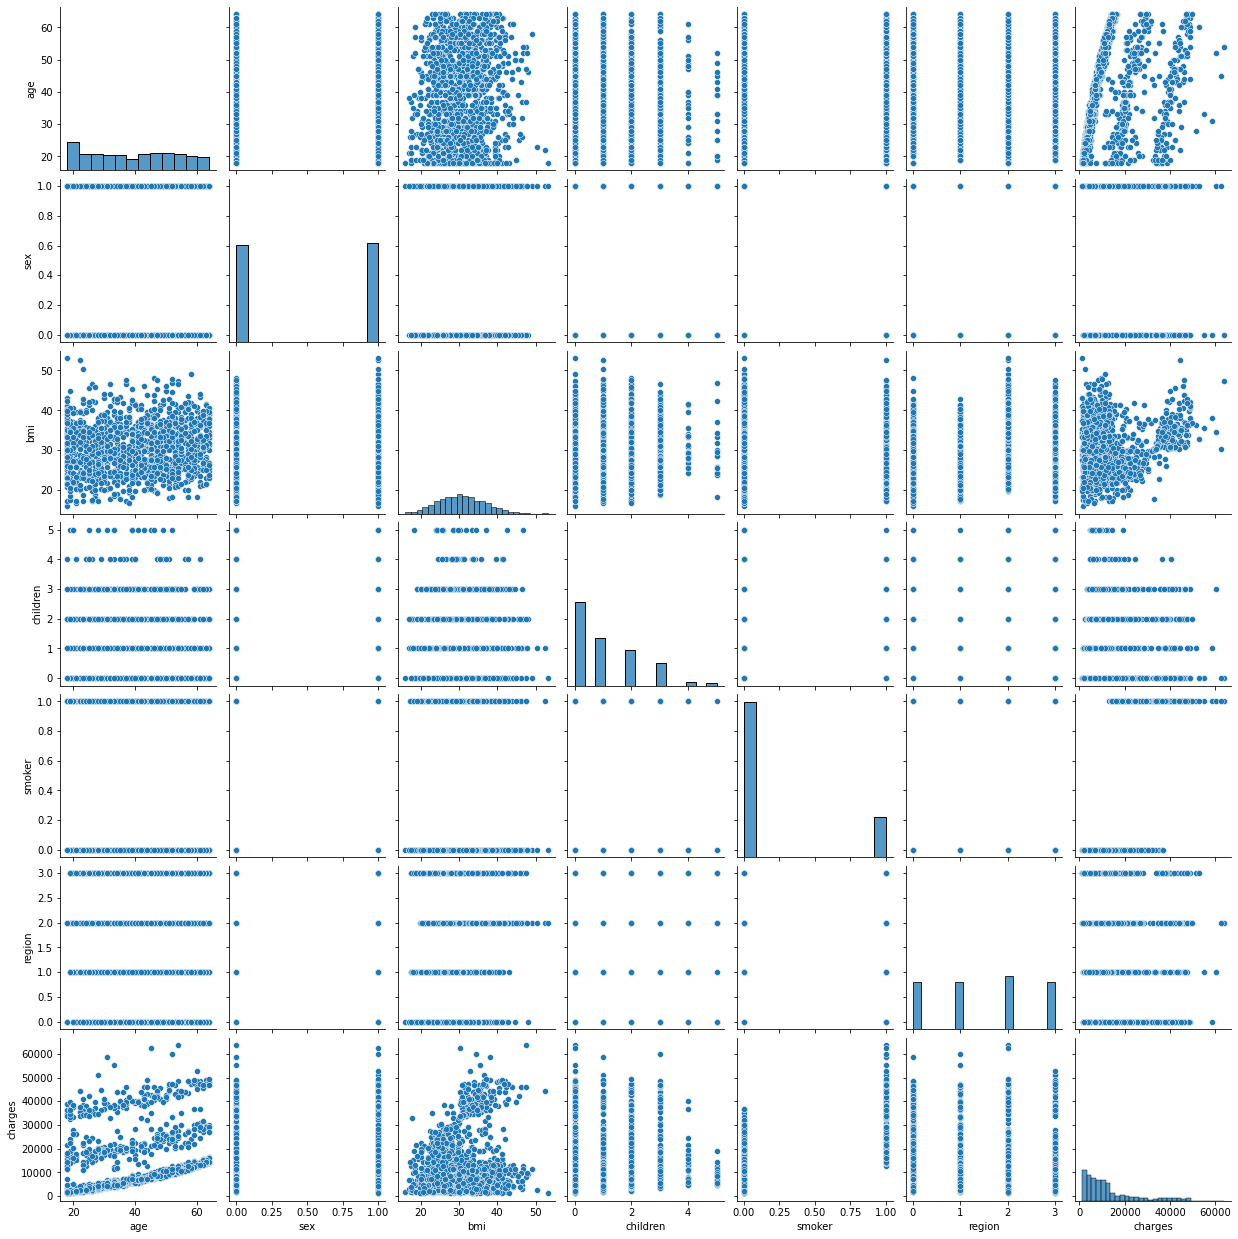

In [52]:
# view scatter plots and distribution plots for variables
sns.pairplot(insurance_df)

### Homoscedasticity

Simply put we want to find homoscedasticity. This means that the residuals have equal or almost equal variance over the entire regression model. 

If there are any patterns when we plot residuals by predicted values, such as residuals being higher when the score is higher, etc. it is a sign of heteroscedasticity.

By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.¶

/Users/mojo_flat/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/mojo_flat/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


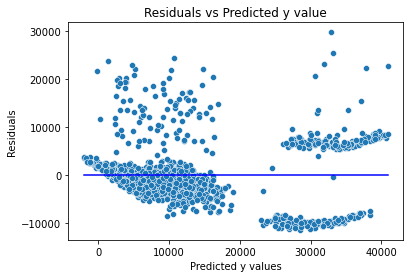

In [58]:
# plot the residuals against predicted values to 
# check for homoscedasticity
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('Predicted y values')
plt.ylabel('Residuals')
#plt.xlim(70,100)
p = sns.lineplot([y_pred.min(),y_pred.max()],[0,0],color='blue')
p = plt.title('Residuals vs Predicted y value')

I can not discern a pattern here, but again we initiated this analysis with an insufficient number of observations.

Here it feels safe to assume that there is not a pattern in the error terms.

### Goldfeld Quandt Test

Another method to check if the variance for the residual is the same for any value of x is to use the Goldfeld Quandt test. The Goldfeld Quandt test is a hypothesis test with the following hypotheses:

**_Null Hypothesis_** $H_{0}$ : The variance of the residuals of the model are the same for any value of x (Homoscedastic)

**_Alternative Hypothesis_** $H_{1}$ : The variance of the residuals of the model are note the same for any value of x (Heteroscedastic)

In [59]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']


test = sms.het_goldfeldquandt(residuals, predictors_int)
lzip(name, test)

[('F statistic', 0.9566557936681557), ('p-value', 0.7155988668351111)]

Here our p-value is `0.716` much greater than `0.05`. This means we are not able to reject the null hypothesis which states our error terms are homoscedastic. 

This further validates the assumption of homoscedasticity of our residuals.

### Normality

We want to check that the residuals are normally distributed

the central limit theorem says that as the sample size increases the distribution tends to be normal. A skew is also visible from the plot. 

/Users/mojo_flat/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


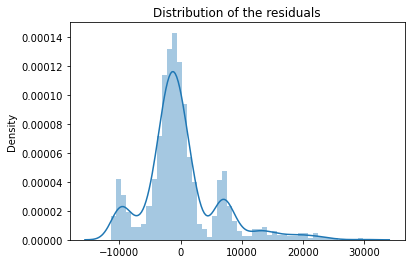

In [60]:
# check for normality among the residuals
p = sns.distplot(residuals,kde=True)
p = plt.title('Distribution of the residuals')

#### Q-Q plot

The Q-Q plot, or quantile-quantile plot, is a graphical tool to help us assess if a set of data plausibly came from some theoretical distribution such as a Normal or exponential

/Users/mojo_flat/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


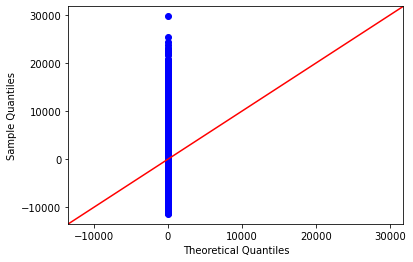

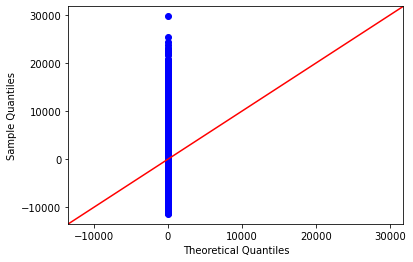

In [65]:
# create a Q-Q plot of the residuals
sm.qqplot(residuals, line ='45')

In [ ]:
## Log Transform

In [ ]:
## Min-Max Scaling

In [ ]:
## Standard Scaling

#### Mean of Residuals = 0: 

When our residuals have a mean of zero, it is another indicator that they are normally distributed and thus do not form patterns or contain much information hidden from the model.

In [63]:
# calculate and print the mean of residuals
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 1.321418311096093e-11


### Independance of Residuals

Ensure that residuals are independent of one another

#### Autocorrelation

When checking for autocorrelation among the residuals, we want to make sure our observations are independent of one another.

There should not be any kind of pattern found among our residuals, they should be independent of one another.

When using the Durbin-Watson statistic to analyze autocorrelation, we consider that the range of the DW statistic is:

$$0 ≤ DW ≤ 4$$where

- DW should be close to `2` if the Null Hypothesis $H_{0}$ = true
- DW $<$ `2` may indicate positive correlation
- DW $>$ `2` may indicate positive correlation

#### Durbin-Watson Test

The Durbin-Watson Test has two hypotheses:

**_Null Hypothesis_** $H_{0}$ : There is no autocorrelation of residuals.

   - $𝑝 = 2$ : Accept the null hypothesis. There is no relationship between the residuals of the observations.

**_Alternative Hypothesis_** $H_{1}$ : There is a strong autocorrelation between residuals.
 
   - $𝑝 < 2$ or $𝑝 > 2$: Reject that there is no relationship between the residuals of the observations.
     

In [66]:
# import durbin-watson test from statsmodels
from statsmodels.stats.stattools import durbin_watson

durbin_watson(residuals)

2.087597685137786

It looks like there is some degree of correlation between the residuals, we can plot this as well using a line plot where we connect the points of the residual against the predicted y values.

/Users/mojo_flat/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


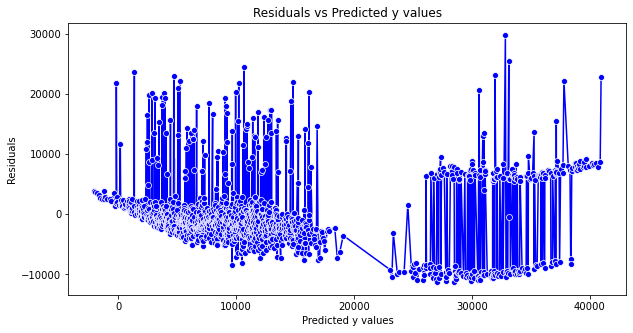

In [69]:
# check for autocorrelation using lineplot
plt.figure(figsize=(10,5))
p = sns.lineplot(y_pred,residuals,marker='o',color='blue')
plt.xlabel('Predicted y values')
plt.ylabel('Residuals')
#plt.xlim(70,100)
#p = sns.lineplot([70,100],[0,0],color='red')
p = plt.title('Residuals vs Predicted y values')

Time series is linearly related to a lagged version of itself. 

The coefficient of correlation between two values in a time series is called the autocorrelation function (ACF).

By plotting the autocorrelation function, we can visualize if there is any high autocorrelation between the residuals. Here the ACF would inform us that there is little correlation between residuals.

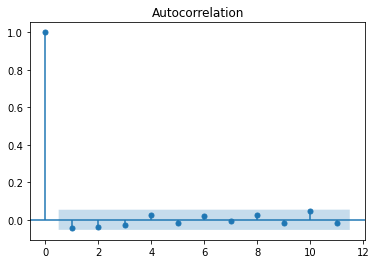

In [71]:
# check for autocorrelation with ACF
sm.graphics.tsa.plot_acf(residuals, lags=11)
plt.show()

#### No perfect multicollinearity

While we want our `hours` variable to have a statistically significant relationship to `score`, a perfect `1.0` correlation would be somewhat suspicious. Here the Pearson Correlation Coefficient for `hours` is 0.96. 

With such a small sample size it can be expected to have a high correlation coefficient.

<AxesSubplot:>

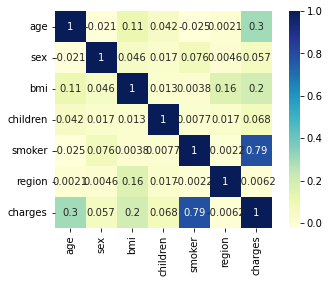

In [73]:
# heatmap of correlation between hours and score
sns.heatmap(insurance_df.corr(), annot=True,cmap='YlGnBu',square=True)

## Sklearn

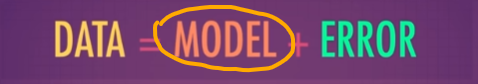

In [ ]:
# import train_test_split from sci-kit learn
from sklearn.model_selection import train_test_split

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
# Create our X and y
y = insurance_df['charges']
X = insurance_df.drop(['charges'], axis=1)

In [ ]:
print(len(X))
print(len(y))

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

# print length
print(len(X_train), len(y_train), len(X_test), len(y_test))

In [ ]:
# Import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Create linear regression object
linreg = LinearRegression()

# Fit lr object to training data
linreg.fit(X_train, y_train)

In [ ]:
# make predictions on training and testing data
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [ ]:
# view predictions array on test data
y_hat_train

$$ \hat y = \hat\beta_0 + \hat\beta_1 x_1 + \hat\beta_2 x_2 +\ldots + \hat\beta_n x_n $$

### Model Intercept

In [ ]:
print('\nModel Intercept:', linreg.intercept_)

Expect a baseline of insurance charges to be $$\hat\beta_0$$ where:
    


***Coefficients***: The coefficients of the features also describe the mathematical relationship between each independent variable and the dependent variable, which in this case is the price of insurance. 

The coefficient value demonstrates how much the mean of the target variable changes given a one-unit change in the feature variable when the other features are unchanged.  

They also inform us if there is a positive or negative correlation between the features and target. For our notebook, we will assess the coefficients of our features to ensure we have features that are relevant to the charge for insurance. For a multivariate linear regression model

### Model Slope

In [ ]:
print('Model Slope:' ,linreg.coef_)

$$\hat\beta_1 = 253.99185244$$

$$\hat\beta_2 = -24.32455098$$

$$\hat\beta_3 = 328.40261701$$

$$\hat\beta_4 = 443.72929547$$

$$\hat\beta_5 = -23568.87948381$$

$$\hat\beta_6 = 288.50857254$$

In [ ]:
insurance_df.columns

For the first policy holder we would say:

$$x1= age_0$$

$$x2= sex_0$$

$$x3= bmi_0$$

$$x4= children_0$$

$$x5= smoker_0$$

$$x6= region_0$$

What exactly are those values?

### Prediction Example

In [ ]:
X_train.iloc[0]

In [ ]:
ph_1_values = list(X_train.iloc[0])
ph_1_values

In [ ]:
slopes = list(linreg.coef_)
slopes

In [ ]:
slopes = [float(n) for n in slopes]

In [ ]:
y_hat_index1 = [slopes[i] * ph_1_values[i] for i in range(len(slopes))]
y_hat_index1

$$ \hat y = \hat\beta_0 + \hat\beta_1 x_1 + \hat\beta_2 x_2 +\ldots + \hat\beta_n x_n $$

In [ ]:
y_hat_index1 = np.sum(y_hat_index1) + float(linreg.intercept_)
y_hat_index1

In [ ]:
y_hat_index1 == y_hat_train[0]

We now have our predictions, and can compare them to the actual price values. The difference between y_train and y_hat_train will be the residuals:

$$r_{i,train} = y_{i,train} - \hat y_{i,train}$$



In [ ]:
# view predictions array on test data
y_hat_train

In [ ]:
# view true data
np.array(y_train)

### Training Results

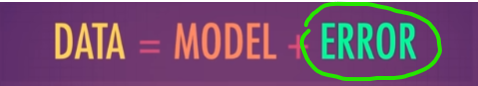

In [ ]:
train_error = y_train-y_hat_train
print('Training Error is:\n',train_error)

#### Training MAE

Mean Absolute Error MAE: Represents average error

$$MAE = \frac{1}{n}\sum_{i=1}^{n}|y_{i} - \hat y_{i}|$$

In [ ]:
training_mae = np.sum(abs(train_error))/len(train_error)
print('\nTraining Mean Absolute Error', training_mae)

The MAE informs us that **on average, our model has an error of** $4,235.38 when **predicting the charges of policy holders in our training data**.

#### Training MSE

The Mean Squared Error, or MSE tells us how close a regression line is to a set of true points. This is achieved by squaring the errors. It contrasts to MAE because it gives more weight to larger distances between the points to the regression line.

**MSE is more useful if we are concerned about large errors whose consequences are much larger than equivalent smaller ones**.

$$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat y_{i})^2$$

In [ ]:
se = np.sum(train_error**2)
print('\nSquared Training Error is', se)
  
mse = se/len(y_train) 
print('\nMean Squared Training Error is', mse)

Our MSE is useful if we are comparing the predictive performance of two or more models. It's values are less interpretable than MAE and RMSE because they are not in the same units as our dependent variable.

#### Training RMSE

Root Mean Square Error: Interpretable MSE in units of y. 

RMSE is more sensitive to outliers, and penalizes large errors more than MAE because errors are squared.

$$RMSE = \sqrt\frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat y_{i})^2$$

In [ ]:
rmse = np.sqrt(mse)
print('\nRoot Mean Square Training Error is', rmse)

Here our RMSE informs us that the expected error between the true value and the value our model predicts is $6,142 when predicting the charges of policy holders in our training data. **This is larger than our MAE of 4,235.38. When MAE < RMSE, it can be indicative that there are outliers present in our data**.

In [ ]:
#from scipy import stats

In [ ]:
#outlier_low = insurance_df['charges'].quantile(0.01)
#outlier_low

In [ ]:
#outlier_high = insurance_df['charges'].quantile(0.99)
#outlier_high

#### Training R Squared

The percentage of variation explained by the relationship between the dependent variable and the independent variable. Lies within values between 0 and 1.

$$SS_{residual} = \sum (y - \hat{y})^2 $$

is the squared difference between $y$ and $\hat y$ (predicted y)

$$SS_{total} = \sum (y - \bar{y})^2 $$

is the squared difference between $y$ and $\overline y$ (mean of y)

So that

$$R^2 = 1- \dfrac{SS_{residual}}{SS_{total}}$$


In [ ]:
SSt = np.sum((y_train - y_train.mean())**2)
R2 = 1- (se/SSt)
print('\nTraining R squared is', R2)

This means there is 73.6% less variation around the regression line than the mean, or **the relationship between the dependent variable and the independent variables explains 73.6% of the variation in the training data**.

#### Training Adjusted R Squared

***Adjusted $R^2$***: The Adjusted $R^2$ is a key metric for evaluation of a multivariate linear regression model, as it accounts for the number of predictors in a model when calculating the model's goodness-of-fit. It is a more accurate measure for assessing if our model explains changes in the dependent variable. 

$$R^2_{adj}= 1-(1-R^2)\dfrac{n-1}{n-p-1}$$

In [ ]:
#display adjusted R-squared
adj_r2 = 1 - (1-linreg.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print('\nTraining Adjusted R squared is', adj_r2)

An Adjusted R-squared value of 0.735 can be described conceptually as: 

> ***73.5% of the variations in dependent variable $y$ are explained by the independent variables $x$ in our model.***

### Testing Results

Recall that...

In [ ]:
test_residuals = y_test - y_hat_test
test_residuals

#### Compare Test and Train Performance

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
print('Training Mean Absolute Error', training_mae)
print('Testing Mean Absolute Error', mean_absolute_error(y_test, y_hat_test))

se = np.sum(train_error**2)
print('\nTraining Squared Error is', se)
  
mse = se/len(y_train) 
print('\nTraining Mean Squared Error is', mse)
print('Testing Mean Squared Error is', mean_squared_error(y_test,y_hat_test))
  
rmse = np.sqrt(mse)
print('\nTraining Root Mean Squared Error is', rmse)
print('Testing Root Mean Squared Error is', np.sqrt(mean_squared_error(y_test,y_hat_test)))
  
SSt = np.sum((y_train - y_train.mean())**2)
R2 = 1- (se/SSt)
print('\nTraining R squared is', R2)
print('Testing R squared is',r2_score(y_test,y_hat_test))

#display adjusted R-squared
train_adj_r2 = 1 - (1-linreg.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print('\nTraining Adjusted R squared is', train_adj_r2)
test_adj_r2 = 1 - (1-linreg.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Testing Adjusted R squared is', test_adj_r2)

**If our model has a higher error for the training set than the test set then we know that our model is not generalizing well and is too complicated, it is overfitting**. In this case we would need to optimize our model and continue iterating through training and testing.

# Practice

### Data Description

In [ ]:
cars_df = pd.read_csv('car_data.csv')

| Column     | Description                                                                                                                                                                                                                |
|------------|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `name`      | **Name of the cars**                                                                                                                                                                                             |
| `year`      | **Year of the car when it was bought**                                                                                                                                                                              |
| `selling_price`      | **Price at which the car is being sold**                                                                                                                                                   |
| `km_driven`   | **Number of Kilometres the car is driven**                                                                                                                                                                      |
| `fuel`   | **Fuel type of car (petrol / diesel / CNG / LPG / electric)**                                                                                                                               |
| `seller_type`  | **Tells if a Seller is Individual or a Dealer**                                                                                                                                                                    |
| `transmission`  | **Gear transmission of the car (Automatic/Manual)**                                                                                                                                                                    |
| `owner`  | **Number of previous owners of the car.**                                                                                                                                                                    |

In [ ]:
cars_df.head()

In [ ]:
cars_df['Vehicle_Age'] = 2022 - cars_df['Year']

In [ ]:
cars_df = pd.get_dummies(cars_df,columns=['Fuel_Type','Transmission','Seller_Type'],drop_first=True)

In [ ]:
cars_df.drop(columns=['Year','Car_Name',],inplace=True)

In [ ]:
cars_df.describe()

In [ ]:
cars_df.info()

In [ ]:
cars_df.describe()

In [ ]:
# create predictors
predictors = cars_df.drop(['Selling_Price'], axis=1)

predictors_int = sm.add_constant(predictors)
model = sm.OLS(cars_df['Selling_Price'],predictors_int).fit()
model.params

## Questions

1. How much variation does our model explain within the data?

2. Based on the p-value of the t-test, which feature has the least statistical influence on the dependent variable?

3. What is the economic impact of the `Vehicle_Age` estimated coefficient?

## Practice Summary

In [ ]:
model.summary()

- Answers:
    
    - 1. Based on R-squared, our model explains 88.3% of the variation within our model. Based on the Adjusted R-Squared 87.3%.
    - 2. `Fuel_Type_Petrol`
    - 3. We can expect a dollar decrease of $0.39 for each unit increase in the `Vehicle_Age` variable, in other words for each year the vehicle ages.

# Conclusion

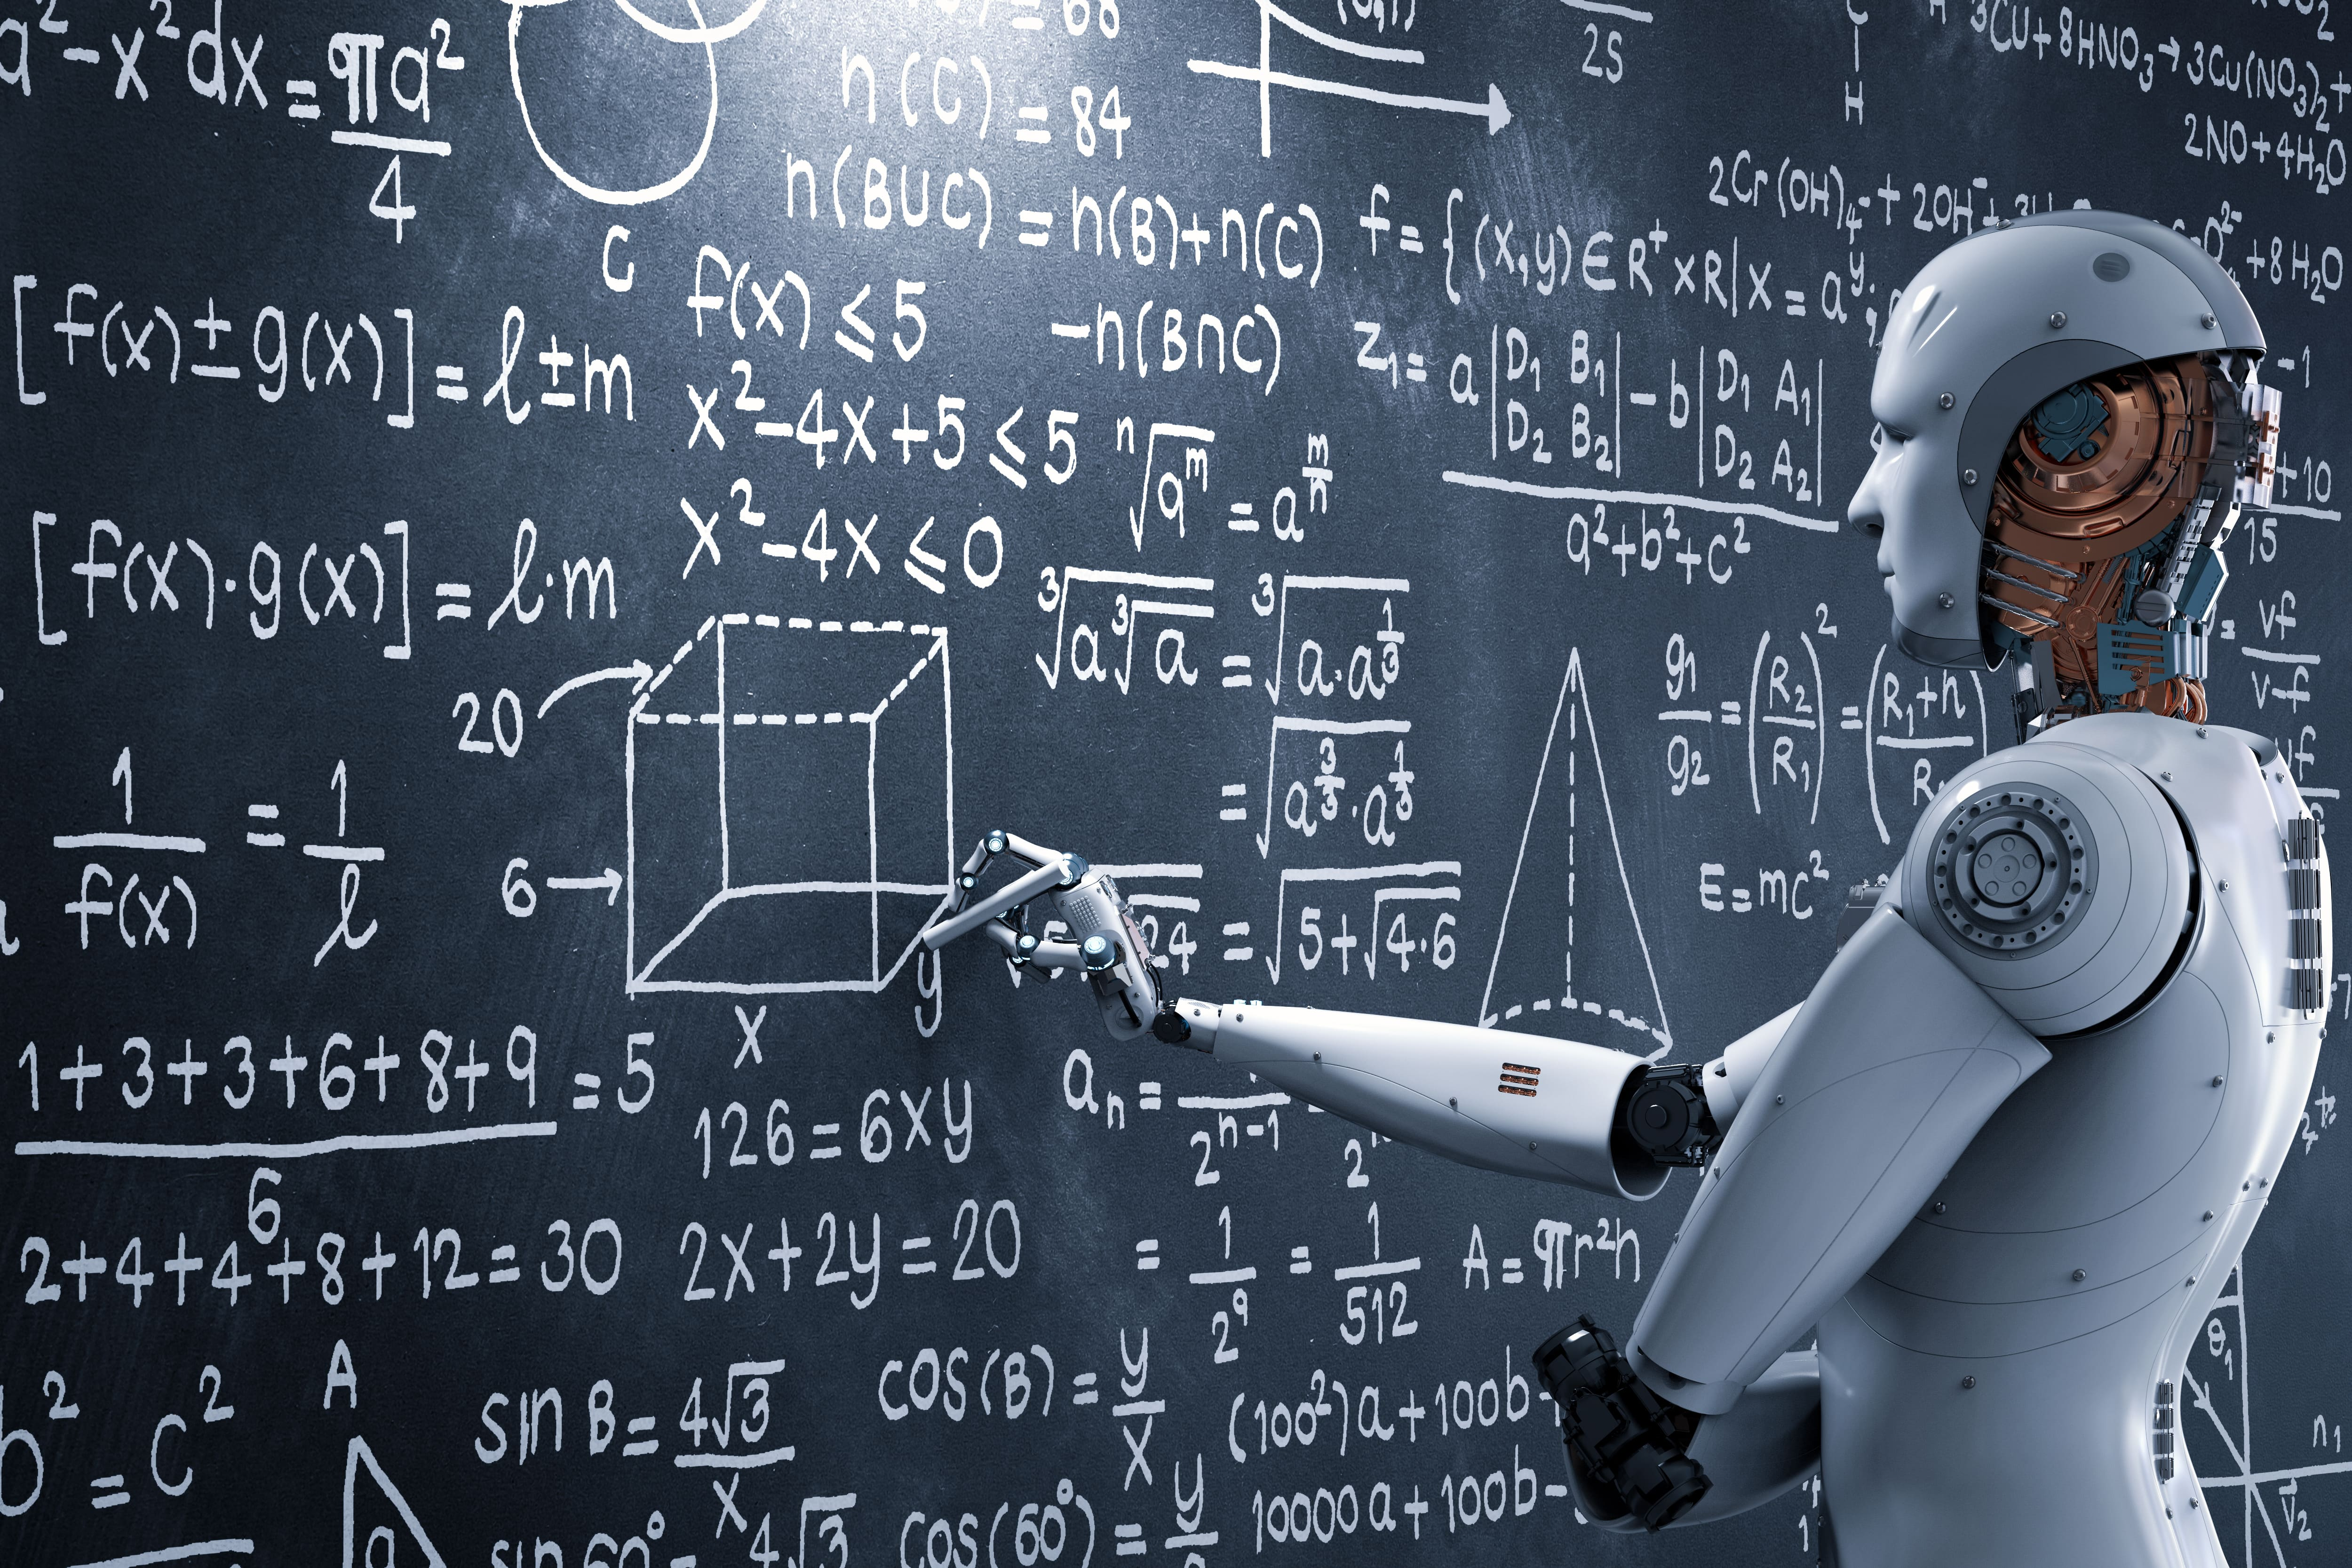

# Thank You

In [ ]:
###############################################################################################################################
###############################################################################################################################
                                                            #THANKS#
###############################################################################################################################
###############################################################################################################################

In [ ]:
# Log Likelihood

 Likelihood Ratio test (often termed as LR test) is a test to compare two models, concentrating on the improvement with respect to likelihood value. If we keep on adding predictor variables to a linear model, R-square will improve. This holds true for model likelihood value as well. But, the objective is to check if the improvement in likelihood is good enough or not!

we have a data set with two variables, X and Y. You have fitted a regression equation between the two and got estimates or coefficients. Now, the likelihood is a measure that tells you how likely is that you will get a dataset like what you have, given the regression equation.

So, higher the value of likelihood, better is the fit of the model. once a regression model is fit, we may like to measure the likelihood of the estimates, for which we look at the log of the likelihood value and call it Log Likelihood.

It is used to compare coefficient values for each variable in the process of creating the model. Log Likelihood value is a measure of goodness of fit for any model. Higher the value, better is the model.

We should remember that Log Likelihood can lie between -Inf to +Inf. Hence, the absolute look at the value cannot give any indication. We can only compare the Log Likelihood values between multiple models.

In [ ]:
# AIC & BIC

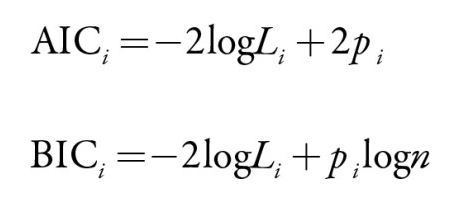

- L = Max likelihood: the parameter with the highest probability of correctly representing the relationship between the input and output
- p = the number of parameters
- n = the number of values in the data set

In [ ]:
#[0.025 and 0.975]

Are both measurements of values of our coefficients within 95% of our data, or within two standard deviations. Outside of these values can generally be considered outliers.

In [ ]:
# Omnibus

Describes the normalcy of the distribution of our residuals using skew and kurtosis as measurements. A 0 would indicate perfect normalcy.

In [ ]:
[0.025 and 0.975] : 

Omnibus : describes the normalcy of the distribution of our residuals using skew and kurtosis as measurements. A 0 would indicate perfect normalcy.

Prob(Omnibus) : is a statistical test measuring the probability the residuals are normally distributed. A 1 would indicate perfectly normal distribution.

Skew : is a measurement of symmetry in our data, with 0 being perfect symmetry.

Kurtosis : measures the peakiness of our data, or its concentration around 0 in a normal curve. Higher kurtosis implies fewer outliers.

Durbin-Watson : is a measurement for autocorrelation.Given the statistical value of 1.28, the test provides evidence that there is less positive autocorrelation present and it means that residual error terms has very less positive autocorrelation and is little bit dependent.

Durbin-Watson to test the autocorrelation in residuals

A common method of testing for autocorrelation is the Durbin-Watson test.

Look for Durbin – Watson (DW) statistic.It must lie between 0 and 4.

If DW = 2, or close to it, implies no autocorrelation
0 < DW < 2 implies positive autocorrelation
while 2 < DW < 4 indicates negative autocorrelation

In [ ]:
# Create a matplotlib figure
plt.figure(figsize=(8, 5))
# Create a scatterplot on the figure of y-train
plt.scatter(y_train, y_hat_train, label='Actual Data')
# Plot y_hat_train
plt.plot(y_train, y_train, label='Model', color='g')
plt.title('Model vs Training Data')
plt.legend()

In [ ]:
# Create a matplotlib figure
plt.figure(figsize=(8, 5))
# Create a scatter plot
plt.scatter(y_test, y_hat_test, label='Actual Data')
plt.plot(y_test, y_test, label='Model', color='r')
plt.title('Model vs Test set')
plt.legend()

In [ ]:
model.mse_model

In [ ]:
rmse = np.sqrt(model.mse_model)
rmse

In [ ]:
insurance_df.describe()

In [ ]:
insurance_df.shape

## Clean Data

### Check for null

In [ ]:
insurance_df.isnull().sum().sort_values(ascending= False)

## Explore Data

In [ ]:
sns.distplot(insurance_df['age'])
plt.title('Age distribution')
plt.ylabel('density')
plt.xlabel('age')
plt.show()

In [ ]:
sns.distplot(insurance_df['charges'])
plt.title('charges distribution')
plt.ylabel('density')
plt.xlabel('charges')
plt.show()

In [ ]:
sns.distplot(insurance_df['bmi'])
plt.title('bmi distribution')
plt.ylabel('density')
plt.xlabel('bmi')
plt.show()

In [ ]:
insurance_df['region'].value_counts()

In [ ]:
fig = plt.figure(figsize = (6,4))
sns.countplot(insurance_df['region'])
plt.title('region distribution')
plt.show()

In [ ]:
insurance_df['sex'].value_counts()

In [ ]:
fig = plt.figure(figsize = (6,4))
sns.countplot(insurance_df['sex'])
plt.title('sex distribution')
plt.show()

In [ ]:
insurance_df['children'].value_counts()

In [ ]:
fig = plt.figure(figsize = (6,4))
sns.countplot(insurance_df['children'])
plt.title('children distribution')
plt.show()

In [ ]:
"""
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
# smoker or not
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
#region
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)
"""

In [ ]:
insurance_df['sex'] = pd.factorize(insurance_df['sex'])[0] + 1
insurance_df['region'] = pd.factorize(insurance_df['region'])[0] + 1
insurance_df['smoker'] = pd.factorize(insurance_df['smoker'])[0] + 1
corr = insurance_df.corr()
corr['charges'].sort_values(ascending=False)

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
corr = insurance_df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)
plt.savefig('insurance_correlation')

In [ ]:
sns.pairplot(insurance_df, diag_kind='kde')

## Model

### Statsmodels

In [ ]:
# create predictors
predictors = insurance_df.drop(['charges'], axis=1)

# predictors same as y from sci-kit learn method

In [ ]:
import statsmodels.api as sm
predictors_int = sm.add_constant(predictors)
model = sm.OLS(insurance_df['charges'],predictors_int).fit()
model.params

In [ ]:
model.summary()

Adjusted R squared penalizes R squared values that include non useful features. If we add features that have low relavence to our model, Adj R Squared will decrease. If Adj R Squared is much lower than R squared, its a sign that a variable may not be relevant to our model.

***P-values***: The $p-value$ or *probability value* is the probability of observing test results at least as extreme as the results actually observed during the test, assuming that the null hypothesis is true. For our multivariate linear regression model, we will set our *alpha value* to 0.05,  $\alpha = 0.05$, equating to a *.95 probability* that the predictor is statistically significantly in effecting the price of the house.We will compare the p-values of our predictors to this alpha value so that:

> $p < 0.05$  The feature has a statistically significant effect on the price of a house

> $p >= 0.05$  The feature does not have a statistically significant impact on the price of a house and will not be included in the model.

In [ ]:
# To compare coefficients between sci-kit learn and statsmodels
Slope: [   253.99185244    -24.32455098    328.40261701    443.72929547
 -23568.87948381    288.50857254]

the intercept term is not included by default, so you have to make sure you manipulate your `predictors` DataFrame so it includes a constant term. You can do this using `.add_constant`.

In [ ]:
predictors_int = sm.add_constant(predictors)
predictors_int

In [ ]:
predictors

Let's check the Bias & Variance of our final model.

In [ ]:
def bias(y, y_hat):
    return np.mean(y - y_hat)
    
def variance(y_hat):
    return np.mean([yi**2 for yi in y_hat]) - np.mean(y_hat)**2
    
# Bias and variance for training set 
b = bias(y_train, y_hat_train) 
v = variance(y_hat_train) 
print('Train bias: {} \nTrain variance: {}'.format(b, v))

In [ ]:
# Bias and variance for testing set 
b = bias(y_test, y_hat_test) 
v = variance(y_hat_test) 
print('Test bias: {} \nTest variance: {}'.format(b, v))

In [ ]:
# Create train & test residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [ ]:
# Show train & test residuals
print(train_residuals)
print(test_residuals)

In [ ]:
# Compute MSE for train and test set
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test = np.sum((y_test-y_hat_test)**2)/len(y_test)

print('Train Mean Squared Error: ', mse_train)
print('Test Mean Squared Error: ', mse_test)

In [ ]:
# import the module
from sklearn.metrics import mean_absolute_error as mae

In [ ]:
training_mae = mae(y_train,y_hat_train)
training_mae

In [ ]:
error = y_test-y_hat_test
se = np.sum(error**2)
print('squared error is', se)
  
mse = se/len(y_test) 
print('mean squared error is', mse)
  
rmse = np.sqrt(mse)
print('root mean square error is', rmse)
  
SSt = np.sum((y_test - y_test.mean())**2)
R2 = 1- (se/SSt)
print('R square is', R2)

In [ ]:
# Return the coefficient of determination of the prediction
linreg.score(X_train, y_train)

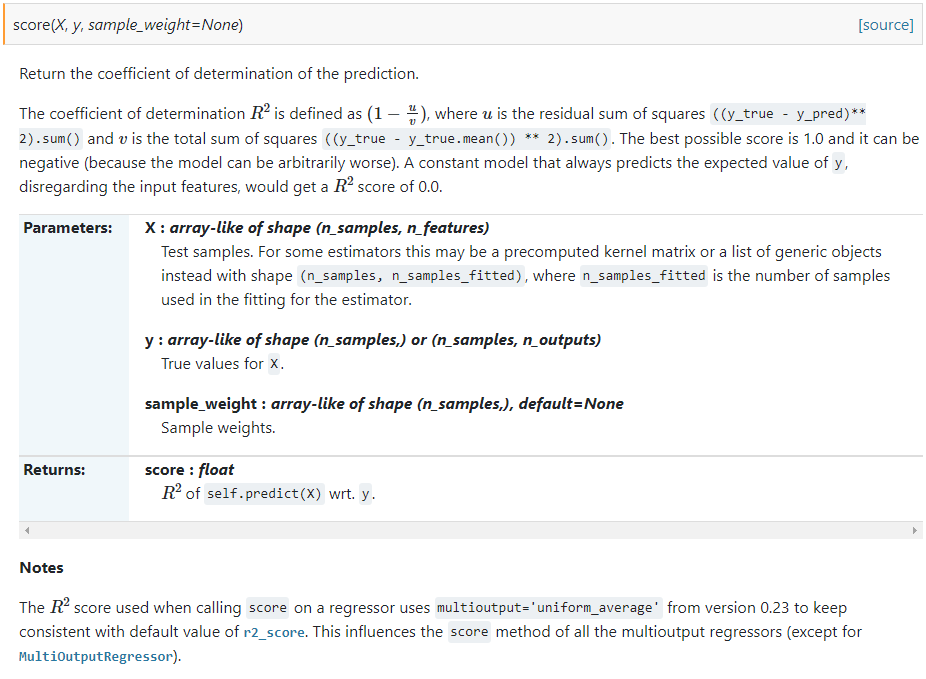

In [ ]:
print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,y_hat_train),
mean_squared_error(y_test,y_hat_test)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,y_hat_train),
r2_score(y_test,y_hat_test)))

If both the train and test sets have high RMSE then our model is poor at making predictions in general and is underfitting.

In [ ]:
# View the columns in our dataframe
insurance_df.columns

In [ ]:
# Import OLS from statsmodels
from statsmodels.formula.api import ols

In [ ]:
# Name the dependent and indepenent variables to be fed into our model
outcome = 'charges'
x_cols = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']

# Create the predictors object to be used in the OLS model
predictors = '+'.join(x_cols)
# Name the formula to create our model
formula = outcome + '~' + predictors
# Create our linear regression model
model = ols(formula=formula, data=insurance_df).fit()
# Call summary to return data on model
model.summary()

In [ ]:
# modify figure size
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(model, 'age', fig=fig)

summary method

In [ ]:
for x in x_cols:
    fig = sm.graphics.plot_regress_exog(model, x, fig=fig)

In [ ]:
# creating regression plots
fig = sm.graphics.plot_regress_exog(model, 'bmi', fig=fig)

## Interpret Results

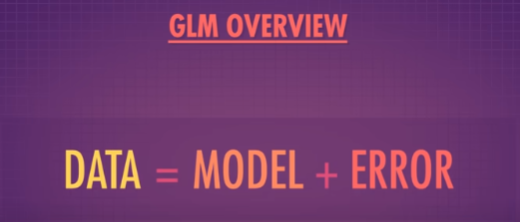

MAE
MSE
RMSE

- R^2
- Adj R^2
- Coef
- P value

p-Value lets us know if our independent variables are statistically significant to the variance in our dependent variable

There are 3 key metrics for evaluation to be used to assess if our model is considered successful. For the purposes of this notebook these will be:

***P-values***: The $p-value$ or *probability value* is the probability of observing test results at least as extreme as the results actually observed during the test, assuming that the null hypothesis is true. For our multivariate linear regression model, we will set our *alpha value* to 0.05,  $\alpha = 0.05$, equating to a *.95 probability* that the predictor is statistically significantly in effecting the price of the house.We will compare the p-values of our predictors to this alpha value so that:

> $p < 0.05$  The feature has a statistically significant effect on the price of a house

> $p >= 0.05$  The feature does not have a statistically significant impact on the price of a house and will not be included in the model.

***Coefficients***: The coefficients of the features also describe the mathematical relationship between each independent variable and the dependent variable, which in this case is the price of the house. The coefficient value demonstrates how much the mean of the target variable changes given a one-unit change in the feature variable when the other features are unchanged.  They also inform us if there is a positive or negative correlation between the features and target. For our notebook, we will assess the coefficients of our features to ensure we have features that are relevant to the price the houses. For a multivariate linear regression model

$$ \hat y = \hat\beta_0 + \hat\beta_1 x_1 + \hat\beta_2 x_2 +\ldots + \hat\beta_n x_n $$ 

the coefficients are recognized as: $$\hat\beta_n$$

***Adjusted $R^2$***: The Adjusted $R^2$ is a key metric for evaluation of a multivariate linear regression model, as it accounts for the number of predictors in a model when calculating the model's goodness-of-fit. It is a more accurate measure for assessing if our model explains changes in the dependent variable. The goal for our model will be **Adjusted $R^2 >= 0.75$**, where

$$SS_{residual} = \sum (y - \hat{y})^2 $$

is the squared difference between $y$ and $\hat y$ (predicted y)

$$SS_{total} = \sum (y - \bar{y})^2 $$

is the squared difference between $y$ and $\overline y$ (mean of y)

So that

$$R^2 = 1- \dfrac{SS_{residual}}{SS_{total}}$$

$$R^2_{adj}= 1-(1-R^2)\dfrac{n-1}{n-p-1}$$

An Adjusted R-squared value of say 0.75 can be described conceptually as: 

> ***75% of the variations in dependent variable $y$ are explained by the independent variables in our model.***

In [ ]:
###############################################################################################################################
###############################################################################################################################
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
###############################################################################################################################
###############################################################################################################################

We can also use VIF (Variance Inflation Factor) to inform us of the features that have too much collinearity, removing these features can help improve the performance of our model. Let's import variance_inflation_factor from statsmodels to get the features VIF scores.

In [ ]:
# Import functions
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Get variables for which to compute VIF and add intercept term
X = p_df[['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'yr_built', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'floors_2_5', 'floors_3_0', 'view_1', 'view_2', 'view_3',
       'view_4', 'condition_3', 'condition_4', 'condition_5', 'grade_10',
       'grade_11', 'grade_12', 'grade_13', 'renovated', 'zip_group_NW',
       'zip_group_SE', 'zip_group_SW', 'in_seatt', 'in_bell',
       'seas_sold_Spring']]
X['Intercept'] = 1

# Compute and view VIF
vif = pd.DataFrame(columns=['variables'])
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(
    X.values, i) for i in range(X.shape[1])]

# View results using print
print(vif['VIF'])

Now lets normalize our data to improve its performance. We can now test if removing outliers from our data will improve its predictive power. To do this simply, we can use the zscore of our dataset and remove any instances where data is outside of the 3rd standard deviation of that column. In order to do this we will:

Call scipy.stats.zscore(a) with a as a DataFrame to get a NumPy array containing the z-score of each value in a.

Call numpy.abs(x) with x as the previous result to convert each element in x to its absolute value. Use the syntax (array < 3).all(axis=1) with array as the previous result to create a boolean array.

Filter the original DataFrame with this result.

## Check if residuals are normally distributed

The .describe() method has returned for us the Interquartile values of our model's residuals. Here we can see the lowest and highest difference in our predictions. Our model underestimated one house by 3.28 million dollars and overestimated another house by 2.28 million dollars. While this is by far a great prediction for these houses, it was the best we could produce using a linear regression model on the dataset. Let's take a look at the distribution of our residuals.

In [ ]:
# Check if residuals are normally distributed
sns.distplot(last_df['resid'], kde=True)

R-squared tells you how well your model fits the data, and the F-test is related to it.

An F-test is a type of statistical test that is very flexible. F-tests can evaluate multiple model terms simultaneously, which allows them to compare the fits of different linear models. In contrast, t-tests can evaluate just one term at a time.


Compare the p-value for the F-test to our significance level of 0.05. If the p-value is less than the significance level, our sample data provides sufficient evidence to conclude that our regression model fits the data better than the model with no independent variables.

This finding is great news because it means that the independent variables in your model improve the fit!

Generally speaking, if none of our independent variables are statistically significant, the overall F-test is also not statistically significant. 

Occasionally, the tests can produce conflicting results. This can occur because the F-test of overall significance assesses all of the coefficients jointly whereas the t-test for each coefficient examines them individually. For example, the overall F-test can find that the coefficients are significant jointly while the t-tests can fail to find significance individually.

The F-test sums the predictive power of all independent variables and determines that it is unlikely that all of the coefficients equal zero. However, it’s possible that each variable isn’t predictive enough on its own to be statistically significant. In other words, your sample provides sufficient evidence to conclude that your model is significant, but not enough to conclude that any individual variable is significant.

If we have a statistically significant overall F-test, we can draw several other conclusions.

In [ ]:
pred_val = model.fittedvalues.copy()
true_val = insurance_df['charges'].values.copy()
residual = true_val - pred_val

In [ ]:
sum = 0
  
# for loop for iteration
for i in range(len(y_train)):
    sum += abs(y_train[i] - y_hat_train[i])

error = sum/len(y_train)
  
# display
print("Mean absolute error : " + str(error))

In [ ]:
low = last_df[last_df['resid'] < -100000]
high = last_df[last_df['resid'] > 100000]

print(f'The model underestimated {round(len(low)/len(last_df)*100,2)}% of house prices by over 100,000')
print(f'The model overestimated {round(len(high)/len(last_df)*100,2)}% house prices by over 100,000')

In [ ]:
The model underestimated 12.12% of house prices by over 100,000
The model overestimated 15.13% house prices by over 100,000

In [ ]:
 and *p-value* and *p-value* and *p-value*

## Differences between Linear Regression and Multiple Linear Regression

- Whereas linear regression only has one independent variable impacting the slope of the relationship, multiple regression incorporates multiple independent variables.

- Each independent variable in multiple regression has its own coefficient to ensure each variable is weighted appropriately.